<a href="https://colab.research.google.com/github/ahmadr75/UK_gov_Twitter_Covid_data_analysis/blob/main/Data_Science_Seminar2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Initialisation

In [ ]:
import os
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
## credentials contain:
consumer_key        = "5aKJhd985bBGzuTmd6ubtWYgA"
consumer_secret     = "dPHCv1Noj0udVF646wrqBBnCW0eDibpf1LD3D8QDwx1E3MqZMC"
access_token        = "1177062871-9bF1WqV2AS9fjXd5tY9xx0JV4j8xRj9q4I5KkPU"
access_token_secret = "quH3ogy2PpRd5dOIro96eLGB3CSBirmjJZ3IniY9bmRfy"

import tweepy
print(tweepy.__version__)

# Authorize our Twitter credentials
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

#Work directory
Work_dir = "/content/drive/MyDrive/DS UK gov/"


3.10.0


#Automated *Users* Seeking

In [ ]:
Tweet_id_file = open(Work_dir+"TweetID_Gen_Auto.csv", "a")
current_file = open(Work_dir+"TweetID_Gen_Auto.csv", "r")
First_time = False # Should be True for the first time search operation

# List of potential keywords leading to official accounts of subject under scrutiny
# transport, Health, NHS, gov, covid, corona, minister

# List of locations
# uk, wales, scotland, nothern-ireland, England, london, Birmingham, glasgow, liverpool, bristol, manchester, sheffield, leeds,

# the query to be searched > a combination of location and keyword from above
q = "leeds health"

current_file.readline()
id_lists = list()
if First_time is False:
  for item in current_file.readlines():
    id_lists.append(int(item.split(', ')[2]))
else:
  Tweet_id_file.write("screen_name" + ", " + "location" + ", " + "id" + ", " + "followers_count" + ", " + "freinds_count" + ", " + "favourites_count, Description\n")

# search the query
users = api.search_users(q, 200)

# save user information of the users retrieved
for user in users:
    user_retreive = api.get_user(user.screen_name)
    if user_retreive.verified == True: #Check whether the user is officially verified within tweeter
        print(user_retreive.id)
        if user_retreive.id not in id_lists:
          Tweet_id_file.write(user.screen_name + ", " + str(user_retreive.location.replace(",", "-")) + ", " + str(user_retreive.id) + ", " + str(user_retreive.followers_count) + ", " + str(user_retreive.friends_count) + ", " + str(user_retreive.favourites_count)+ ", " + user_retreive.description.replace(",", "-").replace("\n", "-") + "\n")
        #print(user_retreive.screen_name)#ID 

Tweet_id_file.close()
current_file.close()

#Results are further cleaned and search for target accounts

338260834
58490193
109237832


#User Info

In [ ]:
userID = "NHSEnglandLDN"

In [ ]:
tweets = api.user_timeline(screen_name=userID, 
                           # 200 is the maximum allowed count
                           count=200,
                           include_rts = False,
                           # Necessary to keep full_text 
                           # otherwise only the first 140 words are extracted
                           tweet_mode = 'extended'
                           )

#Verified ID Parser:

In [ ]:
Tweet = api.get_user(userID)
Tweet.id, Tweet.verified # Outputs the username and the whether it is verfied or not (using a tweet)

(31129844, True)

In [ ]:
# Output information of a tweet
for info in tweets[:1]:
     print("ID: {}".format(info.id))
     print(info.created_at)
     print(info.full_text)
     print("\n")

ID: 1429352707329077248
2021-08-22 08:00:16
Looking for somewhere to get your #COVIDVaccine in the capital today? 👀💉

Check your local area’s pop-up and walk-in vaccination sites  ➡️ https://t.co/NKzeK4mb01 https://t.co/vTOdkzlw9A




#Extraction of information from specified user


In [ ]:
def Tweet_extractor(userID):
  tweets = api.user_timeline(screen_name=userID, 
                             # 200 is the maximum allowed count
                             count=200,
                             include_rts = False,
                             # Necessary to keep full_text 
                             # otherwise only the first 140 words are extracted
                             tweet_mode = 'extended'
                             )
  all_tweets = []
  all_tweets.extend(tweets)
  oldest_id = tweets[-1].id
  while True:
    tweets = api.user_timeline(screen_name=userID, 
                               # 200 is the maximum allowed count
                               count=200,
                               include_rts = False,
                               max_id = oldest_id - 1,
                               # Necessary to keep full_text 
                               # otherwise only the first 140 words are extracted
                               tweet_mode = 'extended'
                               )
    if len(tweets) == 0:
      break
    oldest_id = tweets[-1].id
    all_tweets.extend(tweets)
    print('N of tweets downloaded till now {}'.format(len(all_tweets)))

  outtweets = [[tweet.id_str, 
                tweet.created_at, 
                tweet.favorite_count, 
                tweet.retweet_count, 
                tweet.full_text.encode("utf-8").decode("utf-8")] 
              for idx,tweet in enumerate(all_tweets)]
  return outtweets

In [ ]:
# Please enter your desired user id
userID = "matthancock"

outtweets = Tweet_extractor(userID)

# Creation of dataframe object and saving the file in work directory
df = DataFrame(outtweets,columns=["id","created_at","favorite_count","retweet_count", "text"]) 
df.to_csv('%s_tweets.csv' % userID,index=False)
df.head(3)
!cp /content/matthancock_tweets.csv /content/drive/MyDrive/DS\ UK\ gov/DA_Raw_DB

N of tweets downloaded till now 13


,id,created_at,favorite_count,retweet_count,text
0,1372115555692462082,2021-03-17 09:20:15,0,0,@master_deutsche خيلي لطف داري، اگه برام بفرست...
1,1371883513926983683,2021-03-16 17:58:12,1,0,Can anyone send me #clubhouseinvite?
2,1367038428475498497,2021-03-03 09:05:34,1,0,@Mariaaaaa_R 😂😂👌👌


#Check existance of Covid related subject

---
Also importance of the account under the investigation




In [ ]:
# Take out the text column from the dataset and count the quantities of covid word repeated
x_l = df['text']
cnt = 0
for item in x_l:
  if "covid" in item or "corona" in item:
    if '#' in item:
      cnt += 1
#print out this quantity
print(cnt)

0


In [ ]:
# Plot the number of favorites and retweets overal in the account
ylabels = ["favorite_count","retweet_count"]

fig = plt.figure(figsize=(13,3))
fig.subplots_adjust(hspace=0.01,wspace=0.01)

n_row = len(ylabels)
n_col = 1
for count, ylabel in enumerate(ylabels):
    ax = fig.add_subplot(n_row,n_col,count+1)
    ax.plot(df["created_at"],df[ylabel])
    ax.set_ylabel(ylabel)
plt.show()

In [ ]:
# specified tweets with more than some thresholds of favorites and retweets
df_sub = df.loc[(df["favorite_count"] > 400) & (df["retweet_count"] > 20),:]
for irow in range(df_sub.shape[0]):
    df_row = df_sub.iloc[irow,:]
    
    print(df_row["created_at"])
    print("favorite_count={:6} retweet_count={:6}".format(df_row["favorite_count"],df_row["retweet_count"]))
    print(df_row["text"])
    print("\n")

In [ ]:
page = 1
while True:
  statuses = api.user_timeline(screen_name=userID)
  if statuses:
    for status in statuses:
      # process status here
      print(status)
      #process_status(status)
  else:
    # All done
    break
  page += 1  # next page

# Extract all hashtags in dir


Generates a DB from tweets their ID plus the Hashtags used in total

In [ ]:
# specify the database name
data_dir = Work_dir + "DA_Raw_DB"

filter_chars = [';', ':', '!', "*", ")", "-", "\n", "\\", "|", ".", ":", "?", ";", ",", "@", "$", "%", "^", "*", "(", "~"]

Full_gathered_data = list()

for name in os.listdir(data_dir):
  if name.endswith(".csv"):
    filee = pd.read_csv(data_dir + "/" + name)
    Hashtag_list = list()
    Valid_date_list = list()
    for i in range(filee.shape[0]):
      Year = int(filee['created_at'][i][:4])
      Month = int(filee['created_at'][i][5:7])
      Day = int(filee['created_at'][i][8:10])
      if Year == 2020 and Month > 1 and Day > 2:
        Valid_date_list.append(i)
      if Year == 2021:
          #print("{}.{}.{}".format(Year,Month,Day))
          if Month < 5:
            Valid_date_list.append(i)
    for item in Valid_date_list:
      tweet_text = filee['text'][item]
      if "#" in tweet_text:
        splitted_text = tweet_text.split("#")
        Mined_hashtag = ""
        for i in range(1,len(splitted_text)):
          Mined_hashtag = splitted_text[i].split(" ")[0]
          for it in filter_chars:
            Mined_hashtag = Mined_hashtag.split(it)[0]
          Hashtag_list.append(Mined_hashtag)
    Full_gathered_data.append([name.split("_tweets")[0],Hashtag_list])
dff = pd.DataFrame(Full_gathered_data, columns = ['User_name', 'Hashtags'])
# dff contains all the hashtags of each account

Hashtag DB with counting

In [ ]:
# having a dictionary object used to count the quantities of each hashtag being repeated
Counter_dict = {}
for item in dff['Hashtags']:
  for each in item:
    if each not in Counter_dict:
      Counter_dict[each] = 1
    else:
      Counter_dict[each] = Counter_dict[each] + 1

In [ ]:
# save the results as a dataset in the specified directory, with a threshold of being 10 times repeated
Hashtag_Final_Count = list()
for item in Counter_dict:
  if Counter_dict[item] > 10:
    Hashtag_Final_Count.append([item,Counter_dict[item]])
Hashtag_cnt_data = pd.DataFrame(Hashtag_Final_Count, columns = ['Hashtag_name', 'Count'])
Hashtag_cnt_data = Hashtag_cnt_data.sort_values(by=['Count'],ascending=False)
Hashtag_cnt_data.to_csv(work_dir + 'Raw_Hashtags_plus_relative_classification/Mined_Hashtag_cnt_02022020_31042021.csv', index=False)

In [ ]:
Hashtag_cnt_data

,Hashtag_name,Count
3,COVID19,5125
6,coronavirus,3092
52,HouseofLords,1247
31,Coronavirus,636
34,StayHomeSaveLives,567
...,...,...
69,SettlementScheme,52
36,NHSCOVIDVaccine,52
40,Ambulance,52
73,ScotBudget,51


# Extract based on key words and hashtags


---

After the analysis we created several datasets based on the hashtags that were repeated more and our specified keywords.

The results form two datasets which are used in our project.

In [ ]:
def Search_based_on_hashtags_keywords(input_list, data_dir, dff_type=True):
  if dff_type is True:
    dff = pd.DataFrame(columns = ['User_name', 'Hashtag', 'id', 'created_at', 'favorite_count', 'retweet_count', 'text'])
  else:
    dff = pd.DataFrame(columns = ['User_name', 'Hashtag', 'id', 'created_at'])
  Full_gathered_data = list()
  cnter = 0
  List_per_keyword = list()
  Arr_hld = np.array((7,), dtype=str)
  for name in os.listdir(data_dir):
    if name.endswith(".csv"):
      filee = pd.read_csv(data_dir + "/" + name)
      Hashtag_list = list()
      Valid_date_list = list()
      for i in range(filee.shape[0]):
        Year = int(filee['created_at'][i][:4])
        Month = int(filee['created_at'][i][5:7])
        Day = int(filee['created_at'][i][8:10])
        if Year == 2020:
          if Month == 2 and Day > 2:
            Valid_date_list.append(i)
          elif Month > 2:
            Valid_date_list.append(i)
        if Year == 2021:
            if Month < 5:
              Valid_date_list.append(i)
      for item in Valid_date_list:
        tweet_text = filee['text'][item]
        for key_w in Hashtags_under_search:
          for it in tweet_text.split(" "):
            if key_w == it:
              if dff_type is True:
                dat = name.split("_tweets")[0], key_w.split("#")[1], filee['id'][item],	filee['created_at'][item], filee['favorite_count'][item],	filee['retweet_count'][item],	filee['text'][item]
              else:
                dat = name.split("_tweets")[0], key_w, filee['id'][item],	filee['created_at'][item]
              dff.loc[cnter] = dat
              cnter += 1
  return dff

# the function takes the list and workspace raw db dir to produce a dataset based on our search items (which can be keywords or hashtags)
# dff_type shows the structure in which we want to have the output dataset
data_dir = Work_dir + "DA_Raw_DB"

Hashtags_under_search = ['#COVID19', '#coronavirus', '#HouseofLords', '#Coronavirus', 
                         '#StayHomeSaveLives', '#LordsQs', '#KeepWalesSafe', 
                         '#COVIDー19', '#StayAlert', '#OurNHSPeople', '#Covid19', 
                         '#PMQs', '#HelpUsHelpYou', '#vaccine', '#COVIDVaccine', 
                         '#ThankYouNHS', '#EveryMindMatters', '#HereForYou', 
                         '#COVID', '#NHS', '#ClinicalResearch', '#BackToSchoolSafely', 
                         '#TravelSafely', '#LetsTalkLoneliness', '#flu', 
                         '#CovidVaccine', '#HandsFaceSpace', '#HowAreYouDoing', '#YouAreNotAlone', 
                         '#EnjoySummerSafely', '#covid19', '#ResearchVsCovid', 
                         '#OxfordVaccine', '#MentalHealth', '#howareyoudoing', 
                         '#WelshQs', '#WorkingSafely', '#StayHome', 
                         '#StayAtHome', '#FMQs', '#InThisTogether', '#PHEHealthMatters', 
                         '#ICYMI', '#StaySafe', '#YellowCard', '#WeAreScotland', 
                         '#RECOVERYtrial', '#COVID19LessonsLearnt', 
                         '#PriorityCovidResearch', '#NHSCOVIDVaccine', 
                         '#VaccinesWork', '#BePartofResearch', '#mentalhealth', 
                         '#PublicHealth', '#BuildBackBetter', 
                         '#WorldMentalHealthDay', "#SafeOnline", "#vaccines"]

dff = Search_based_on_hashtags_keywords(data_dir, Hashtags_under_search)

In [ ]:
# save the dataset in our desired location
dff.to_csv('/content/drive/MyDrive/DS UK gov/Specified_hashtag_n_keyword_search/Hashtags_per_user_plusinfo_02022020_31042021.csv', index=False)

# Time relative to keyword or hashtag

In [ ]:
Hashtags_under_search = ['#COVID19', '#coronavirus', '#HouseofLords', '#Coronavirus', 
                         '#StayHomeSaveLives', '#LordsQs', '#KeepWalesSafe', 
                         '#COVIDー19', '#StayAlert', '#OurNHSPeople', '#Covid19', 
                         '#PMQs', '#HelpUsHelpYou', '#vaccine', '#COVIDVaccine', 
                         '#ThankYouNHS', '#EveryMindMatters', '#HereForYou', 
                         '#COVID', '#NHS', '#ClinicalResearch', '#BackToSchoolSafely', 
                         '#TravelSafely', '#LetsTalkLoneliness', '#flu', 
                         '#CovidVaccine', '#HandsFaceSpace', '#HowAreYouDoing', '#YouAreNotAlone', 
                         '#EnjoySummerSafely', '#covid19', '#ResearchVsCovid', 
                         '#OxfordVaccine', '#MentalHealth', '#howareyoudoing', 
                         '#WelshQs', '#WorkingSafely', '#StayHome', 
                         '#StayAtHome', '#FMQs', '#InThisTogether', '#PHEHealthMatters', 
                         '#ICYMI', '#StaySafe', '#YellowCard', '#WeAreScotland', 
                         '#RECOVERYtrial', '#COVID19LessonsLearnt', 
                         '#PriorityCovidResearch', '#NHSCOVIDVaccine', 
                         '#VaccinesWork', '#BePartofResearch', '#mentalhealth', 
                         '#PublicHealth', '#BuildBackBetter', 
                         '#WorldMentalHealthDay', "#SafeOnline", "#vaccines"]

In [ ]:
# data_dir ="/content/drive/MyDrive/DS UK gov/DA_Raw_DB"

# Hashtags_under_search = ['#vaccine', '#COVIDVaccine', '#CovidVaccine', 
#                          '#OxfordVaccine', '#NHSCOVIDVaccine', 
#                          '#VaccinesWork', '#vaccines']
# #Hashtags_under_search = ['Vaccine', 'vaccine', 'Vaccination', 'vaccination', 'vaccinated', 'coronavaccine', 'covidvaccine',
# #                         'immunization', 'immunisation', 'immunize', 'immunise']
# dff = pd.DataFrame(columns = ['User_name', 'Hashtag', 'id', 'created_at'])
# Full_gathered_data = list()
# cnter = 0
# List_per_keyword = list()
# Arr_hld = np.array((7,), dtype=str)
# for name in os.listdir(data_dir):
#   if name.endswith(".csv"):
#     filee = pd.read_csv(data_dir + "/" + name)
#     Hashtag_list = list()
#     Valid_date_list = list()
#     for i in range(filee.shape[0]):
#       Year = int(filee['created_at'][i][:4])
#       Month = int(filee['created_at'][i][5:7])
#       Day = int(filee['created_at'][i][8:10])
#       if Year == 2020:
#         if Month == 2 and Day > 2:
#           Valid_date_list.append(i)
#         elif Month > 2:
#           Valid_date_list.append(i)
#       if Year == 2021:
#           if Month < 5:
#             Valid_date_list.append(i)
#     for item in Valid_date_list:
#       tweet_text = filee['text'][item]
#       for key_w in Hashtags_under_search:
#         for it in tweet_text.split(" "):
#           if key_w == it:
#             dat = name.split("_tweets")[0], key_w.split("#")[1], filee['id'][item],	filee['created_at'][item], filee['favorite_count'][item],	filee['retweet_count'][item],	filee['text'][item]
#             dff.loc[cnter] = dat
#             cnter += 1

In [ ]:
# dff.to_csv('/content/drive/MyDrive/DS UK gov/Specified_hashtag_n_keyword_search/Vaccination_Hashtags_for_user_plustime_02022020_31042021.csv', index=False)

In [ ]:
# data_dir ="/content/drive/MyDrive/DS UK gov/DA_Raw_DB"

# Hashtags_under_search = ['#COVID19', '#coronavirus', '#HouseofLords', '#Coronavirus', 
#                          '#StayHomeSaveLives', '#LordsQs', '#KeepWalesSafe', 
#                          '#COVIDー19', '#StayAlert', '#OurNHSPeople', '#Covid19', 
#                          '#PMQs', '#HelpUsHelpYou', '#vaccine', '#COVIDVaccine', 
#                          '#ThankYouNHS', '#EveryMindMatters', '#HereForYou', 
#                          '#COVID', '#NHS', '#ClinicalResearch', '#BackToSchoolSafely', 
#                          '#TravelSafely', '#LetsTalkLoneliness', '#flu', 
#                          '#CovidVaccine', '#HandsFaceSpace', '#HowAreYouDoing', '#YouAreNotAlone', 
#                          '#EnjoySummerSafely', '#covid19', '#ResearchVsCovid', 
#                          '#OxfordVaccine', '#MentalHealth', '#howareyoudoing', 
#                          '#WelshQs', '#WorkingSafely', '#StayHome', 
#                          '#StayAtHome', '#FMQs', '#InThisTogether', '#PHEHealthMatters', 
#                          '#ICYMI', '#StaySafe', '#YellowCard', '#WeAreScotland', 
#                          '#RECOVERYtrial', '#COVID19LessonsLearnt', 
#                          '#PriorityCovidResearch', '#NHSCOVIDVaccine', 
#                          '#VaccinesWork', '#BePartofResearch', '#mentalhealth', 
#                          '#PublicHealth', '#BuildBackBetter', 
#                          '#WorldMentalHealthDay', "#SafeOnline", "#vaccines"]
# dff = pd.DataFrame(columns = ['User_name', 'Hashtag', 'id', 'created_at'])
# Full_gathered_data = list()
# cnter = 0
# List_per_keyword = list()
# Arr_hld = np.array((7,), dtype=str)
# for name in os.listdir(data_dir):
#   if name.endswith(".csv"):
#     filee = pd.read_csv(data_dir + "/" + name)
#     Hashtag_list = list()
#     Valid_date_list = list()
#     for i in range(filee.shape[0]):
#       Year = int(filee['created_at'][i][:4])
#       Month = int(filee['created_at'][i][5:7])
#       Day = int(filee['created_at'][i][8:10])
#       if Year == 2020:
#         if Month == 2 and Day > 2:
#           Valid_date_list.append(i)
#         elif Month > 2:
#           Valid_date_list.append(i)
#       if Year == 2021:
#           #print("{}.{}.{}".format(Year,Month,Day))
#           if Month < 5:
#             Valid_date_list.append(i)
#     for item in Valid_date_list:
#       tweet_text = filee['text'][item]
#       for key_w in Hashtags_under_search:
#         for it in tweet_text.split(" "):
#           if key_w == it:
#             dat = name.split("_tweets")[0], key_w, filee['id'][item],	filee['created_at'][item]
#             dff.loc[cnter] = dat
#             cnter += 1

In [ ]:
dff

,User_name,Hashtag,id,created_at
0,DHSCgovuk,#NHS,1388229167708217348,2021-04-30 20:30:00
1,DHSCgovuk,#COVID19,1388168772863856641,2021-04-30 16:30:01
2,DHSCgovuk,#COVID19,1388148854332313604,2021-04-30 15:10:52
3,DHSCgovuk,#COVID19,1388115927464431620,2021-04-30 13:00:01
4,DHSCgovuk,#COVID19,1388044198687870976,2021-04-30 08:15:00
...,...,...,...,...
11708,publichealthni,#coronavirus,1228635061576065024,2020-02-15 11:00:00
11709,publichealthni,#coronavirus,1228408569021648896,2020-02-14 20:00:00
11710,publichealthni,#coronavirus,1228345872854982656,2020-02-14 15:50:52
11711,publichealthni,#COVID,1227593198681255939,2020-02-12 14:00:00


Time object plot

In [ ]:
import matplotlib
from datetime import datetime
import csv

In [ ]:
sorted_dff_peraccount = dff.sort_values(by=['User_name'],ascending=False) #sort by user name

In [ ]:
## cnt_idx > keeps total number of tweets tweeted from various accounts  
## list_user_notrepeated > keeps dictionary of accounts mapping into numbers corresponding to each account
ID_Cnt = 0
cnt = 0
list_user_notrepeated = {}
for i in range(len(sorted_dff_peraccount)): 
  if sorted_dff_peraccount['User_name'][i] not in list_user_notrepeated:
    list_user_notrepeated[sorted_dff_peraccount['User_name'][i]] = cnt
    cnt += 1
Array_hld = np.chararray((cnt,4*365), itemsize=10, unicode=True)
cnt_idx = np.zeros((cnt+1), dtype=int)
id_list = list()
for i in range(len(sorted_dff_peraccount)):
  # following if checks if the tweet is already added in another hashtag
  if sorted_dff_peraccount['id'][i] not in id_list:
    id_list.append(sorted_dff_peraccount['id'][i])
    ID_Cnt = list_user_notrepeated[sorted_dff_peraccount['User_name'][i]]
    Array_hld[ID_Cnt][cnt_idx[ID_Cnt]] = sorted_dff_peraccount['created_at'][i]
    cnt_idx[ID_Cnt] += 1

# output > Array_hld which consists dates of various tweets for cnt_idx

In [ ]:
Dates_per_number_dict = {}
for i in range(len(cnt_idx)):
  for j in range(cnt_idx[i]):
    if Array_hld[i][j] not in Dates_per_number_dict:
      Dates_per_number_dict[Array_hld[i][j]] = 1
    else:
      Dates_per_number_dict[Array_hld[i][j]] = Dates_per_number_dict[Array_hld[i][j]] + 1

In [ ]:
datetime_obj = list()
values_list = list()
for item in Dates_per_number_dict:
  # Sometimes one day springs so we can do sth like this and define a threshold
  if Dates_per_number_dict[item] < 800:
    values_list.append(Dates_per_number_dict[item])
    datetime_obj.append(datetime.strptime(item, '%Y-%m-%d'))
  else:
    values_list.append(100)
    datetime_obj.append(datetime.strptime(item, '%Y-%m-%d'))
# Preperation of data based on hashtags and time objects

In [ ]:
# datetime_obj

In [ ]:
# dff.to_csv('/content/drive/MyDrive/DS UK gov/Specified_hashtag_n_keyword_search/Vaccination_Hashtags_for_user_plustime_02022020_31042021.csv', index=False)

Making a new dataset for hashtags per time

In [ ]:

dff = pd.DataFrame(columns = ['Time', 'Hashtags'])
Full_gathered_data = list()
cnter = 0
List_per_keyword = list()
Arr_hld = np.array((7,), dtype=str)
for item in Dates_per_number_dict:
  dff.loc[cnter] = (datetime.strptime(item, '%Y-%m-%d'), Dates_per_number_dict[item])
  cnter += 1

Making two datasets for Covid death and new cases daily based on time

In [ ]:
Our_reference_dataset = ['/content/drive/MyDrive/DS UK gov/COVID statistics /Covid_death_rates.csv',
                         '/content/drive/MyDrive/DS UK gov/COVID statistics /Covid_new_cases.csv']

cnter = 0
dff_death_rates = pd.DataFrame(columns = ['Time', 'Deat_per_day'])
with open(Our_reference_dataset[0], 'r', newline='') as csvfile: #Define the location in the list to desired dataset
  datareader = csv.reader(csvfile)
  next(datareader)
  for row in datareader:
    dff_death_rates.loc[cnter] = (datetime.strptime(row[0], '%m/%d/%Y'), row[1])
    cnter += 1

# The output would be a dataset of real-world data per time

In [ ]:
# 1. outer join on time between both datasets
# 2. sort per time
# 3. save the dataset with desired name

dff_hashtags_death = pd.concat([dff.set_index('Time'),dff_death_rates.set_index('Time')], axis=1, join='outer')
dff_hashtags_death = dff_hashtags_death.sort_values(by=['Time'],ascending=True)
dff_hashtags_death.to_csv('/content/drive/MyDrive/DS UK gov/Relative_Diagrams/Hashtags_Death_ratio1.csv', index=True)

,Time,Deat_per_day
0,2021-04-30,8
1,2021-04-29,13
2,2021-04-28,14
3,2021-04-27,12
4,2021-04-26,11
...,...,...
420,2020-03-06,0
421,2020-03-05,3
422,2020-03-04,0
423,2020-03-03,2


In [ ]:
# dff_hashtags_death = pd.concat([dff.set_index('Time'),dff_death_rates.set_index('Time')], axis=1, join='outer')

In [ ]:
# pd.concat([dff.set_index('Time'),dff_death_rates.set_index('Time')], axis=1, join='outer')

,Hashtags,Deat_per_day
Time,,
2020-02-03,5,NaN
2020-02-04,3,NaN
2020-02-05,7,NaN
2020-02-06,4,NaN
2020-02-07,4,NaN
...,...,...
2021-04-26,33,11
2021-04-27,39,12
2021-04-28,46,14


In [ ]:
# dff_hashtags_death = dff_hashtags_death.sort_values(by=['Time'],ascending=True)

In [ ]:
# dff_hashtags_death.to_csv('/content/drive/MyDrive/DS UK gov/Relative_Diagrams/Hashtags_Death_ratio1.csv', index=True)

In [ ]:
# dff_hashtags_death.to_csv('/content/drive/MyDrive/DS UK gov/Relative_Diagrams/Hashtags_NewCase_ratio.csv', index=True)

In [ ]:
# dff.sort_values(by=['Time'],ascending=False)

,Time,Hashtags
0,2021-04-30,26
1,2021-04-29,36
2,2021-04-28,46
3,2021-04-27,39
4,2021-04-26,33
...,...,...
408,2020-02-07,4
392,2020-02-06,4
406,2020-02-05,7
428,2020-02-04,3


In [ ]:
# dff.to_csv('/content/drive/MyDrive/Hashtags_per_day.csv', index=False)

In [ ]:
Dates_per_number_dict

Plot a high quality image of dataframe

In [ ]:
from matplotlib.dates import DateFormatter

In [ ]:
def Plot_image(datetime_obj,values_list, title_g="",Date_format="%Y-%m", dpi=800, save_enable = True):
  fig, ax = plt.subplots(figsize=(20, 8))

  # Add x-axis and y-axis
  ax.plot(datetime_obj,values_list,
        color='purple')

  # Set title and labels for axes
  ax.set(xlabel="Date",
        ylabel="Tweets Count",
        title=title_g)

  # Define the date format
  date_form = DateFormatter(Date_format)
  ax.xaxis.set_major_formatter(date_form)
  if save_enable is True:
    plt.savefig("/content/drive/MyDrive/DS UK gov/Specified_hashtag_n_keyword_search/Vaccination_keywords_per_month.png",dpi=800)
  plt.show()

title_g = ["Daily Tweets Related to Covid Feb 2020 - May 2021 Across all accounts",
           "Daily Vaccination Related Tweets Feb 2020 - May 2021"]

Plot_image(datetime_obj,values_list, title_g=title_g[0], save_enable = False)

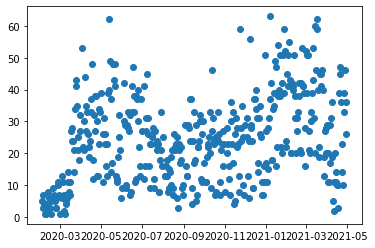

In [ ]:
# dates = matplotlib.dates.date2num(datetime_obj)
# matplotlib.pyplot.plot_date(dates, values_list)

In [ ]:
# c = 0
# for item in values_list:
#   if item > c:
#     c = item

In [ ]:
# datetime_obj.append(datetime.strptime(item, '%Y-%m-%d'))

63

In [ ]:
# fig, ax = plt.subplots(figsize=(20, 8))

# # Add x-axis and y-axis
# ax.bar(datetime_obj,values_list,
#        color='purple')

# # Set title and labels for axes
# ax.set(xlabel="Date",
#        ylabel="Tweets Count",
#        title="Daily Vaccination Related Tweets Feb 2019 - May 2021")

# # Define the date format
# date_form = DateFormatter("%Y-%m")
# ax.xaxis.set_major_formatter(date_form)
# plt.savefig("/content/drive/MyDrive/DS UK gov/Specified_hashtag_n_keyword_search/Vaccination_keywords_per_month.png",dpi=800)
# plt.show()



In [ ]:
# fig, ax = plt.subplots(figsize=(20, 8))

# # Add x-axis and y-axis
# ax.bar(datetime_obj,values_list,
#        color='blue')

# # Set title and labels for axes
# ax.set(xlabel="Date",
#        ylabel="Total Tweets Count",
#        title="Daily Tweets Related to Covid Feb 2020 - May 2021 Across all accounts")

# # Define the date format
# date_form = DateFormatter("%Y-%m")
# ax.xaxis.set_major_formatter(date_form)
# plt.savefig("/content/drive/MyDrive/DS UK gov/Raw_Hashtags_plus_relative_classification/Tweet_per_month.png",dpi=800)
# plt.show()



In [ ]:
values_list

In [ ]:
# sorted_dff_pertime = dff.sort_values(by=['created_at'],ascending=False)
# datetime_object = list()
# for i in range(len(dff)):
#   datetime_object.append(datetime.strptime(sorted_dff_pertime['created_at'][i], '%Y-%m-%d %H:%M:%S'))
# for 
# #dates = matplotlib.dates.date2num(datetime_object)


In [ ]:
# cnt = 0
# for item in datetime_object:
#   if item.year == 2020:
#     for co in range(1,13):
#       if item.month == co:
        

#EXtracting Retweets

Vaccinations

In [ ]:
import csv
import sys

In [ ]:
def Extract_retweets(DB_path, Out_DB_path, Wait_rate = True, Limit = 100)#Pasrses at most 100 retweets into output database (Wait_rate should be true to parse retweets with api limitation)

In [ ]:
def Extract_retweets(DB_path, Out_DB_path, Wait_rate = True, Limit = 100):#Pasrses at most 100 retweets into output database (Wait_rate should be true to parse retweets with api limitation)
  # Authorize our Twitter credentials
  auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
  auth.set_access_token(access_token, access_token_secret)
  api = tweepy.API(auth)
  api = tweepy.API(auth, wait_on_rate_limit=Wait_rate)

  db_file = open(Data_dir, 'r')
  db_file.readline()
  id_name_lists = list()
  user_names_list = list()
  for item in db_file.readlines():
    splt = item.split(',')[2]
    if splt not in id_name_lists:
      id_name_lists.append(splt)
      user_names_list.append(item.split(',')[0])
  print("User list length {}".format(len(user_names_list)))
  with open(Out_DB_path, 'a', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    #spamwriter.writerow(["User_name", "ID", "List_of_retweets"])
    for i, ID in enumerate(id_name_lists):
      if i > 421: # in case of an interruption this can be increased so u can begin from the middle of the dataset where the parsing was performed lately by just seeting i more than the desired value
        # the ID of the tweet
        # number to retweets to be retrieved
        count = Limit
        # getting the retweeters
        retweets_list = api.retweets(int(ID), count)
        #print(len(retweets_list))
        # printing the screen names of the retweeters
        user_names = list()
        user_names.append(user_names_list[i])
        user_names.append(ID)
        for retweet in retweets_list:
          user_names.append(retweet.user.screen_name)
        spamwriter.writerow(user_names)
        # print out i counting to set in case of interruption
        sys.stdout.write("\r" + "#samples written: {}".format(i))
        sys.stdout.flush()

#  For hashtags retweets
Data_dir = '/content/drive/MyDrive/DS UK gov/Specified_hashtag_n_keyword_search/Vaccination_Hashtags_for_user_plustime_02022020_31042021.csv'
Out_DB_path = '/content/drive/MyDrive/DS UK gov/Retweets_data/Retweets_related_2_Vaccination_Hashtags.csv'
Extract_retweets(data_dir, Out_DB_path)

# For Vaccination keywords retweets
Data_dir = '/content/drive/MyDrive/DS UK gov/Specified_hashtag_n_keyword_search/Hashtags_per_user_plusinfo_02022020_31042021.csv'
Out_DB_path = '/content/drive/MyDrive/DS UK gov/Retweets_data/Retweets_related_2_Covid_Hashtags.csv'
Extract_retweets(data_dir, Out_DB_path)

In [ ]:
# import pandas as pd
# import csv
# import sys

# Data_dir = '/content/drive/MyDrive/DS UK gov/Specified_hashtag_n_keyword_search/Hashtags_per_user_plusinfo_02022020_31042021.csv'
# pd_df = pd.read_csv(Data_dir)
# # Authorize our Twitter credentials
# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_token_secret)
# api = tweepy.API(auth)
# api = tweepy.API(auth, wait_on_rate_limit=True)

# id_name_lists = list()
# user_names_list = list()
# for it in range(len(pd_df['id'])):
#   splt = pd_df['id'][it]
#   if splt not in id_name_lists:
#     id_name_lists.append(splt)
#     user_names_list.append(pd_df['User_name'][it])
# print("User list length {}".format(len(user_names_list)))
# with open('/content/drive/MyDrive/DS UK gov/Retweets_data/Retweets_related_2_Covid_Hashtags.csv', 'a', newline='') as csvfile:
#   spamwriter = csv.writer(csvfile, delimiter=',',
#                           quotechar='|', quoting=csv.QUOTE_MINIMAL)
#   #spamwriter.writerow(["User_name", "ID", "List_of_retweets"])
#   for i, ID in enumerate(id_name_lists):
#     if i > 10570:#6619:
#       # the ID of the tweet
#       # number to retweets to be retrieved
#       count = 100
#       # getting the retweeters
#       retweets_list = api.retweets(int(ID), count)
#       #print(len(retweets_list))
#       # printing the screen names of the retweeters
#       user_names = list()
#       user_names.append(user_names_list[i])
#       user_names.append(ID)
#       for retweet in retweets_list:
#         user_names.append(retweet.user.screen_name)
#       spamwriter.writerow(user_names)
#       sys.stdout.write("\r" + "#samples written: {}".format(i))
#       sys.stdout.flush()

User list length 10571


Cleaning Databases


In [ ]:
# import pandas as pd
# import csv

In [ ]:
# Creating a dataset with an attribute of list of retweets and saving it in csv format

id_lists = list()
Data_file = '/content/drive/MyDrive/DS UK gov/Retweets_data/Retweets_related_2_Covid_Hashtags.csv'
with open(Data_file, 'r', newline='') as csvfile:
  datareader = csv.reader(csvfile)
  next(datareader)  # yield the header row
  with open('/content/drive/MyDrive/DS UK gov/Retweets_data/Retweets_related_2_Covid_Hashtags_cleaned.csv', 'w', newline='') as csvfile1:
    spamwriter = csv.writer(csvfile1, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(["User_name", "ID", "List_of_retweets"])
    for row in datareader:      
      user_names = list()
      if row[1] not in id_lists:
        id_lists.append(row[1])
        for retweet in row:
          user_names.append(retweet)
        spamwriter.writerow(user_names)

In [ ]:
# We need a list of our specified accounts and their names so:
# list_names is the name of our specified gov accounts in our former datasets

Data_dir = '/content/drive/MyDrive/DS UK gov/Specified_hashtag_n_keyword_search/Hashtags_per_user_plusinfo_02022020_31042021.csv'
#Hashtags_per_user_plusinfo_02022020_31042021
#Vaccination_Hashtags_for_user_plustime_02022020_31042021
#Vaccination_Keywords_for_user_plustime_02022020_31042021
pd_df = pd.read_csv(Data_dir)
list_names = list()
time_list = list()
cnter=0
for name in pd_df['User_name']:
  if name not in list_names:
    list_names.append(name)
  cnter += 1


In [ ]:
# pd_df

,User_name,Hashtag,id,created_at
0,DHSCgovuk,vaccination,1388229167708217348,2021-04-30 20:30:00
1,DHSCgovuk,Vaccine,1388195194122670081,2021-04-30 18:15:00
2,DHSCgovuk,vaccine,1388148854332313604,2021-04-30 15:10:52
3,DHSCgovuk,vaccine,1388115927464431620,2021-04-30 13:00:01
4,DHSCgovuk,vaccination,1388115927464431620,2021-04-30 13:00:01
...,...,...,...,...
6202,publichealthni,vaccine,1291328168100425729,2020-08-06 11:00:01
6203,publichealthni,vaccine,1290603386320990209,2020-08-04 11:00:00
6204,publichealthni,vaccine,1286254734030987264,2020-07-23 11:00:00
6205,publichealthni,vaccine,1285167386623172608,2020-07-20 10:59:16


In [ ]:
# Creating a dictionary based on id and creation time properties of our former datasets

dict_id_time = {}
for cnt in range(len(pd_df)):
  dict_id_time[pd_df['id'][cnt]] = pd_df['created_at'][cnt]

In [ ]:
# We check if there are
# 1. Any self retweets > Remove them
# 2. If it is retweeted from accounts specified within the gov > Keep them
# e.g. "Retweets_related_2_Covid_Hashtags_specified" is our fully cleaned dataset

Data_file = '/content/drive/MyDrive/DS UK gov/Retweets_data/Retweets_related_2_Covid_Hashtags_cleaned.csv'
with open(Data_file, 'r', newline='') as csvfile:
  datareader = csv.reader(csvfile)
  next(datareader)  # yield the header row
  with open('/content/drive/MyDrive/DS UK gov/Retweets_data/Retweets_from_specified_accounts/Retweets_related_2_Covid_Hashtags_specified.csv', 'w', newline='') as csvfile1:
    spamwriter = csv.writer(csvfile1, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(["User_name", "ID", "Tweet_time","List_of_specified_retweets"])  
    for row in datareader:
      gonna_write = list()
      gonna_write.append(row[0])
      gonna_write.append(row[1])
      try:
        gonna_write.append(dict_id_time[int(row[1])])
      except:
        print(row)
        break
      list_retweeters = row[2:]
      lets_write = False
      for each in list_retweeters:
        if each in list_names:
          if each != row[0]:
            lets_write = True
            gonna_write.append(each)
      if lets_write is True:
        spamwriter.writerow(gonna_write)

#Counting retweets from the dataset

In here, we want to have the quantity of data (which can be retweet data) per month granularity shown in a dataset.

So, first we specify the users and then we will extract and sum up the countings on our data per month.

In [ ]:
# import pandas as pd
# import csv

In [ ]:
# name dict is further used to have our specified user names under investigation

name_dict = list()
Data_file = '/content/drive/MyDrive/DS UK gov/Retweets_data/Retweets_from_specified_accounts/Retweets_related_2_Covid_Hashtags_specified.csv'
with open(Data_file, 'r', newline='') as csvfile:
  datareader = csv.reader(csvfile)
  next(datareader)  # yield the header row
  for row in datareader:
    name_list = row[0]
    #for item in name_list:
    if name_list not in name_dict:
      name_dict.append(name_list)

In [ ]:
name_dict # our specified usernames

['DHSCgovuk',
 'PHE_uk',
 'NHSEngland',
 'CommonsHealth',
 'nadhimzahawi',
 'MattHancock',
 'UKParliament',
 'HouseofCommons',
 'UKHouseofLords',
 'BorisJohnson',
 '10DowningStreet',
 'UKGovScotland',
 'scotgov',
 'scotgovhealth',
 'nidirect',
 'healthdpt',
 'fmwales',
 'UKGovWales',
 'WelshGovernment',
 'PublicHealthW',
 'NHSResearchScot',
 'P_H_S_Official',
 'GenomicsEngland',
 'NIHRresearch',
 'JimBethell',
 'UKCivilService',
 'transportgovuk',
 'educationgovuk',
 'mhclg',
 'beisgovuk',
 'DCMS',
 'DWP',
 'MHRAgovuk',
 'publichealthni']

In [ ]:
# Creating a dictionary based on dates per available months which is going to hold the quantities of data repition per account in each month

headings = list()
headings.append("User name")
date_dict = {}
Data_file = '/content/drive/MyDrive/DS UK gov/Retweets_data/Retweets_from_specified_accounts/Retweets_related_2_Covid_Hashtags_specified.csv'
with open(Data_file, 'r', newline='') as csvfile:
  datareader = csv.reader(csvfile)
  next(datareader)  # yield the header row
  for row in datareader:
    name_list = row[2][:7]
    if name_list not in date_dict:
      date_dict[name_list] = 0
      headings.append(name_list)

In [ ]:
date_dict

{'2020-02': 0,
 '2020-03': 0,
 '2020-04': 0,
 '2020-05': 0,
 '2020-06': 0,
 '2020-07': 0,
 '2020-08': 0,
 '2020-09': 0,
 '2020-10': 0,
 '2020-11': 0,
 '2020-12': 0,
 '2021-01': 0,
 '2021-02': 0,
 '2021-03': 0,
 '2021-04': 0}

In [ ]:
def Retweet_count_pertime(DB_file, Out_DB_file, name_dict, date_dict):#Makes a dictionary from our specified accounts and outputs a db quantities of retweet on each tweet per month
  drid_lists = list()
  date_list = list()
  
  with open(Out_DB_file, 'w', newline='') as csvfile1:
    spamwriter = csv.writer(csvfile1, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)  
    spamwriter.writerow(headings)
    for item1 in name_dict:
      with open(DB_file, 'r', newline='') as csvfile:
        datareader = csv.reader(csvfile)
        next(datareader)  # yield the header row
        print(item1)
        for row in datareader: 
          if item1 == row[0]:
            print(row)
            date_dict[row[2][:7]] = date_dict[row[2][:7]] + len(row[3:])
      print(date_dict, item1)
      write_list = list()
      write_list.append(item1)
      for item in headings[1:]:
        write_list.append(date_dict[item])
        date_dict[item] = 0
      spamwriter.writerow(write_list)


Data_file = '/content/drive/MyDrive/DS UK gov/Retweets_data/Retweets_from_specified_accounts/Retweets_related_2_Covid_Hashtags_specified.csv'
Out_ds = '/content/drive/MyDrive/DS UK gov/Retweets_data/Retweets_from_specified_accounts/3_Analysis_automated.csv'
Retweet_count_pertime(Data_file, Out_ds, name_dict, date_dict) # Produces the dataset

# Couting Hashtags per account per month

In [ ]:
name_dict = list()
Data_file = '/content/drive/MyDrive/Hashtags_per_user_plusinfo_02022020_31042021.csv'
with open(Data_file, 'r', newline='') as csvfile:
  datareader = csv.reader(csvfile)
  next(datareader)  # yield the header row
  for row in datareader:
    name_list = row[0]
    #for item in name_list:
    if name_list not in name_dict:
      name_dict.append(name_list)

In [ ]:
headings = list()
headings.append("User name")
date_dict = {}
with open(Data_file, 'r', newline='') as csvfile:
  datareader = csv.reader(csvfile)
  next(datareader)  # yield the header row
  for row in datareader:
    name_list = row[3][:7]
    if name_list not in date_dict:
      date_dict[name_list] = 0
      headings.append(name_list)

In [ ]:
id_lists = list()
date_list = list()

with open('/content/drive/MyDrive/Hashtag_permonth_automated.csv', 'w', newline='') as csvfile1:
  spamwriter = csv.writer(csvfile1, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)  
  spamwriter.writerow(headings)
  for item1 in name_dict:
    with open(Data_file, 'r', newline='') as csvfile:
      datareader = csv.reader(csvfile)
      next(datareader)  # yield the header row
      print(item1)
      for row in datareader: 
        if item1 == row[0]:
          print(row)
          date_dict[row[3][:7]] = date_dict[row[3][:7]] + 1
    print(date_dict, item1)
    write_list = list()
    write_list.append(item1)
    for item in headings[1:]:
      write_list.append(date_dict[item])
      date_dict[item] = 0
    spamwriter.writerow(write_list)

# *Others*

Image Extraction of DB

In [ ]:
# install the needed package for image download from twitter
!pip install wget

In [ ]:
import wget

In [ ]:
# Extract all images from a list of accounts specified for covid related data
db_file = open(work_dir + "TweetID_Gen_Auto.csv", "r")  
db_file.readline()
id_name_lists = list()
for item in db_file.readlines():
  id_name_lists.append(item.split(', ')[0])
#pull tweets from specific user. In userID, just put the page's username
for idd_nm in id_name_lists:
  while True:
    tweets = api.user_timeline(screen_name=idd_nm, 
                           # 200 is the maximum allowed count
                           count=200,
                           include_rts = False,
                           max_id = oldest_id - 1,
                           # Necessary to keep full_text 
                           # otherwise only the first 140 words are extracted
                           tweet_mode = 'extended'
                           )
    
    if len(tweets) == 0:
        break
    media_files = set()
    for status in tweets:
      media = status.entities.get('media', [])
      if(len(media) > 0):
        media_files.add(media[0]['media_url'])

    for tweet in tweets:
        for media in tweet.entities.get("media",[{}]):
            #checks if there is any media-entity
            if media.get("type",None) == "photo":
                # checks if the entity is of the type "photo"
                # save to file etc.
                wget.download(media["media_url"],out="/content/down1/")
                #download(image_content, "/content/ukk")
    oldest_id = tweets[-1].id
    all_tweets.extend(tweets)
    print('N of tweets downloaded till now {}'.format(len(all_tweets)))

In [ ]:
# directory in which we will save the images
!mkdir /content/down1/

In [ ]:
# Extract all images from an account specified for covid related data
acc_nam = "itsFlo"

all_tweets = []
# Authorize our Twitter credentials
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
#oldest_id = tweets[-1].id
while True:
    tweets = api.user_timeline(screen_name=acc_nam, 
                           # 200 is the maximum allowed count
                           count=200,
                           include_rts = False,
                           max_id = oldest_id - 1,
                           # Necessary to keep full_text 
                           # otherwise only the first 140 words are extracted
                           tweet_mode = 'extended'
                           )
    
    if len(tweets) == 0:
        break
    media_files = set()
    for status in tweets:
      media = status.entities.get('media', [])
      if(len(media) > 0):
        media_files.add(media[0]['media_url'])

    for tweet in tweets:
        for media in tweet.entities.get("media",[{}]):
            #checks if there is any media-entity
            if media.get("type",None) == "photo":
                # checks if the entity is of the type "photo"
                # save to file etc.
                wget.download(media["media_url"],out="/content/down1/")
                #download(image_content, "/content/ukk")
    oldest_id = tweets[-1].id
    all_tweets.extend(tweets)
    print('N of tweets downloaded till now {}'.format(len(all_tweets)))

current trend in twitter

In [ ]:
#Python Trend Retreival - Current Tweets
# -*- coding: utf-8 -*-
import sys
import tweepy
import json


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# Where On Earth ID for Brazil is 23424768.
BRAZIL_WOE_ID = 44418

brazil_trends = api.trends_place(BRAZIL_WOE_ID)

trends = json.loads(json.dumps(brazil_trends, indent=1))

for trend in trends[0]["trends"]:
	#print (trend["name"]).strip("#")
  print(trend['name'])


Santander
#Wembley
MATCH DAY
Heidi
poots
George Square
Essex
#FACupFinal
#HerGameToo
#Caturday
Matthew Parris
Lenny Henry
Tinie Tempah
Travellers
Lavazza
Ibrox
SAGE
Koch
Jamesy
The Times
Royal British Legion
Debenhams
GAME DAY
Burnley v Leeds
Bowen
Kennedy
Up the Chels
Foxes
Happy Birthday Theo
Priti Patel in £20m PPE
New Jack
Leicester City
1st XI
Knockout
Bangladesh
Pablo
Armed Forces
2nd XI
Nish Kumar
Raph
Palace Pier
West Suffolk Hospital
Jim Davidson
Ramsey
Turf Moor
Endwalker
Ministerial Code
Zhurong
Heathrow
